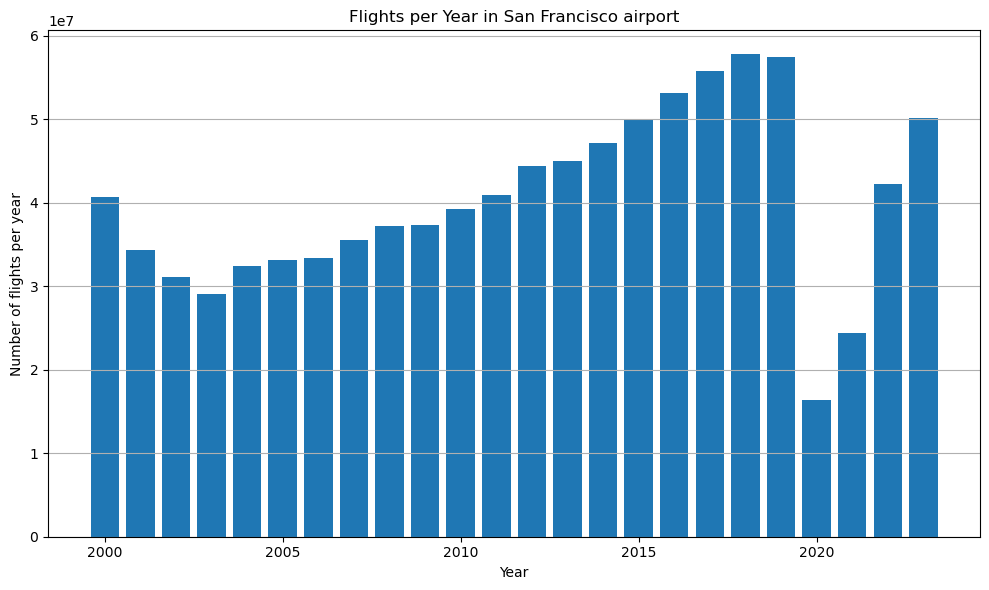

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a pandas DataFrame
df = pd.read_csv("Air_Traffic_Passenger_Statistics_20240408.csv")

# Extract the year from the 'Activity Period Start Date' column
df['Year'] = pd.to_datetime(df['Activity Period Start Date']).dt.year

# Filter data for complete years (excluding 1999 and 2014)
df = df[~df['Year'].isin([1999, 2024])]

# Group data by year and calculate total passenger count
year_wise_flights = df.groupby('Year')['Passenger Count'].sum()

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(year_wise_flights.index, year_wise_flights.values)
plt.xlabel('Year')
plt.ylabel('Number of flights per year')
plt.title('Flights per Year in San Francisco airport')  # Assuming data covers 2024 based on dates
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines for better visualization
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Display the plot
plt.show()


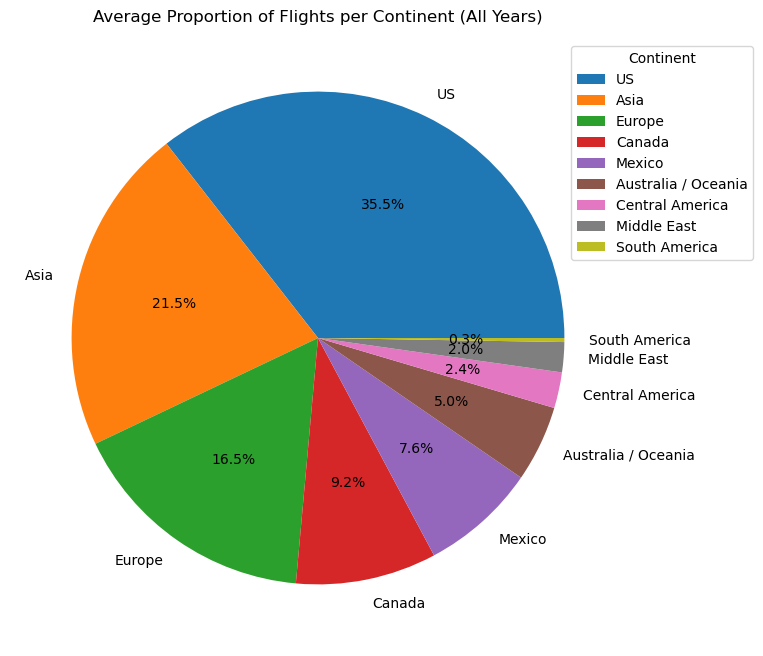

In [14]:

# Count flights per continent
continent_wise_flights = df['GEO Region'].value_counts()

# Threshold for filtering (adjust as needed)
threshold = 1  # Hide continents with average proportion below 5%

# Filter data for continents above threshold
filtered_prop = continent_wise_flights[continent_wise_flights >= threshold]


# Plot a pie chart with legend positioned to the right
plt.figure(figsize=(8, 8))  # Adjust figure size as needed
plt.pie(continent_wise_flights, labels=filtered_prop.index, autopct='%1.1f%%')
plt.title('Average Proportion of Flights per Continent (All Years)')

# Legend positioning
plt.legend(title='Continent', loc='center left', bbox_to_anchor=(0.90, 0.8))  # Adjust slightly as needed

plt.show()


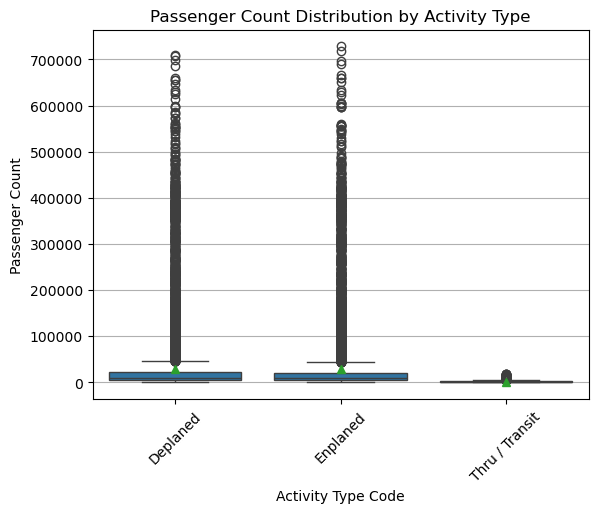

In [20]:

import seaborn as sns  # Import seaborn for box plot



# Create a box plot
sns.boxplot(
    x = "Activity Type Code",
    y = "Passenger Count",
    showmeans=True,  # Display means as well
    data=df
)
plt.xlabel('Activity Type Code')
plt.ylabel('Passenger Count')
plt.title('Passenger Count Distribution by Activity Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()


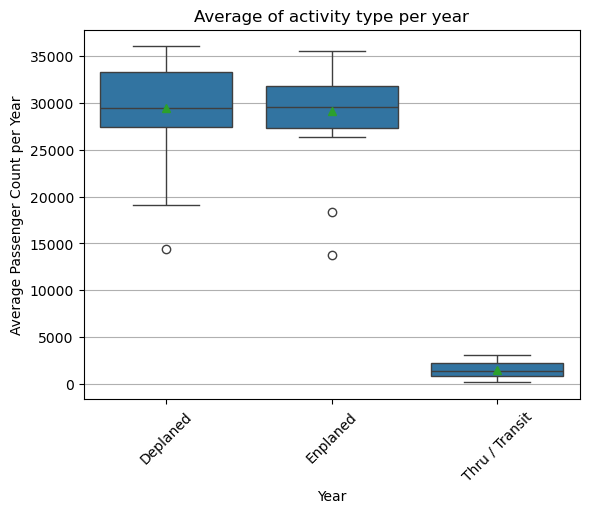

In [24]:
import seaborn as sns

# Calculate average passenger count per year
avg_passengers_per_year = df.groupby(['Year', 'Activity Type Code'])['Passenger Count'].mean()

# Create a box plot
sns.boxplot(
    x = "Activity Type Code",
    y = "Passenger Count",
    showmeans=True,  # Display means as well
    data=avg_passengers_per_year.reset_index()  # Reset index for box plot
)
plt.xlabel('Year')
plt.ylabel('Average Passenger Count per Year')
plt.title('Average of activity type per year')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')
plt.show()

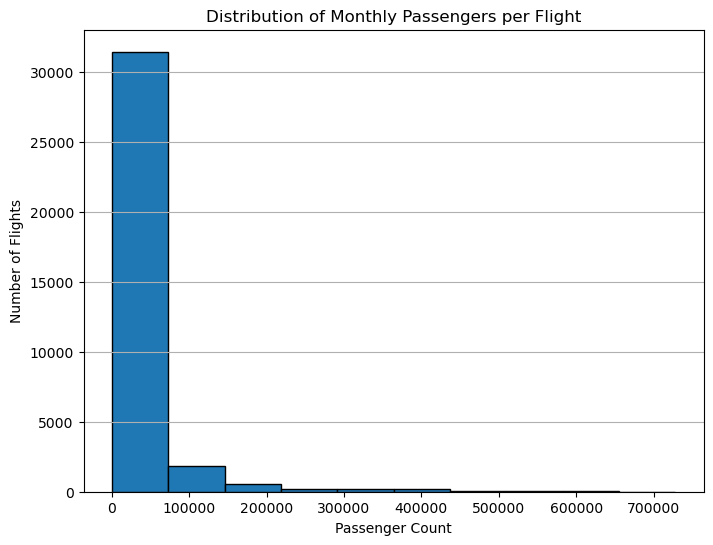

In [18]:


# Create a histogram
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.hist(df['Passenger Count'], bins=10, edgecolor='black')  # Adjust bin count as needed
plt.xlabel('Passenger Count')
plt.ylabel('Number of Flights')
plt.title('Distribution of Monthly Passengers per Flight')
plt.grid(axis='y')
plt.show()
